### Importing Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
data = pd.read_csv("purchases.txt", sep='\t', header=None)

In [3]:
data

,0,1,2
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25
...,...,...,...
51238,163230,30.0,2011-11-12
51239,154410,100.0,2013-11-15
51240,189270,30.0,2014-12-23
51241,173810,30.0,2015-05-28


In [4]:
# Renaming the columns
data.columns = ['cust_id', 'purchase', 'date']
data.head()

,cust_id,purchase,date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [5]:
# Changing customer ID data type from Integer to String
data['cust_id'] = data.cust_id.astype('str')

In [6]:
data.head()

,cust_id,purchase,date
0,760,25.0,2009-11-06
1,860,50.0,2012-09-28
2,1200,100.0,2005-10-25
3,1420,50.0,2009-07-09
4,1940,70.0,2013-01-25


In [7]:
# Getting year column
data['year'] = pd.DatetimeIndex(data['date']).year
data.head()

,cust_id,purchase,date,year
0,760,25.0,2009-11-06,2009
1,860,50.0,2012-09-28,2012
2,1200,100.0,2005-10-25,2005
3,1420,50.0,2009-07-09,2009
4,1940,70.0,2013-01-25,2013


In [8]:
data.describe()

,purchase,year
count,51243.000000,51243.000000
mean,62.337195,2010.869699
std,156.606801,2.883072
min,5.000000,2005.000000
25%,25.000000,2009.000000
50%,30.000000,2011.000000
75%,60.000000,2013.000000
max,4500.000000,2015.000000


### Exploratory Data Analysis

C:\Users\rajde\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='purchase'>

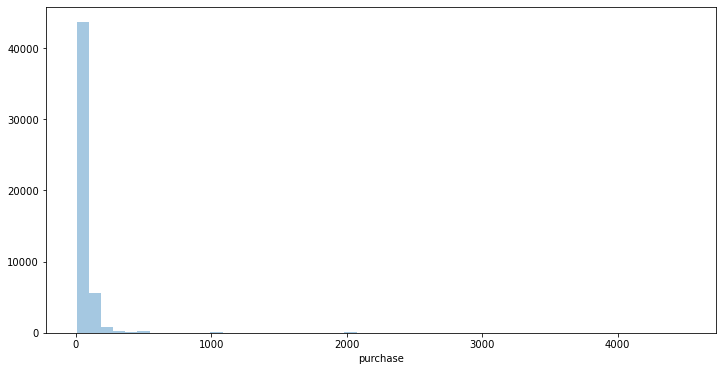

In [9]:
# Purchase pattern
plt.figure(figsize = (12,6))
sns.distplot(data['purchase'], kde = False)

#### Purchase is right skewed

In [10]:
# Yearwise footfall

In [11]:
data.groupby('year').agg({'year':['count']})

,year
,count
year,
2005,1470
2006,2182
2007,4674
2008,4331
2009,5054
2010,4939
2011,4785
2012,5960


C:\Users\rajde\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

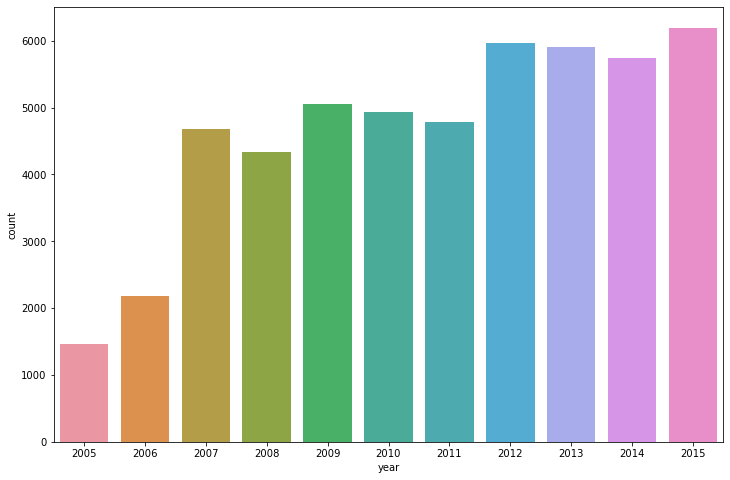

In [12]:
plt.figure(figsize = (12,8))
sns.countplot(data['year'])

#### Inference: We can see that trend is increasing for each year but for the last 4 years the trend has become static

In [13]:
# Year wise Mean Purchase Amount
data.groupby('year').purchase.mean()

year
2005    55.826122
2006    52.250454
2007    49.264014
2008    53.071780
2009    50.745253
2010    58.740012
2011    63.519300
2012    62.913312
2013    67.931357
2014    75.390347
2015    77.197697
Name: purchase, dtype: float64

<AxesSubplot:xlabel='year'>

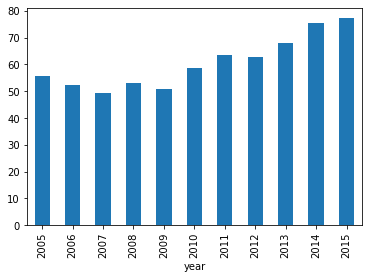

In [14]:
data.groupby('year').purchase.mean().plot(kind='bar')

#### mean purchase is decreasing first from 2005 to 2007 and then increasing 

<AxesSubplot:xlabel='year'>

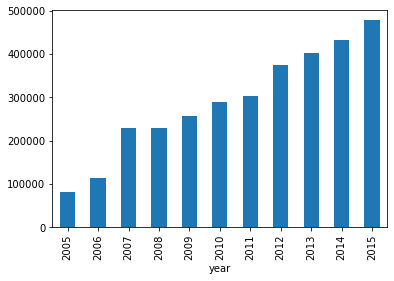

In [15]:
data.groupby('year').purchase.sum().plot(kind='bar')

#### Inference: Sum of purchase is increasing yearwise

# Last Date from the dataset

In [16]:
data['date'] = pd.to_datetime(data['date'], format= '%Y-%m-%d')

In [17]:
end_date = data['date'].max()
end_date

Timestamp('2015-12-31 00:00:00')

# Calculating Days since last purchase

In [18]:
data['days_since']=data['date'].apply(lambda x : (end_date - x).days+1)

In [19]:
data.head()

,cust_id,purchase,date,year,days_since
0,760,25.0,2009-11-06,2009,2247
1,860,50.0,2012-09-28,2012,1190
2,1200,100.0,2005-10-25,2005,3720
3,1420,50.0,2009-07-09,2009,2367
4,1940,70.0,2013-01-25,2013,1071


# Grouping Data based on customer ID

## Forming Customer Dataframe

In [20]:
customer = data.groupby('cust_id').agg({'days_since':'min', 'cust_id':'count', 'purchase':'mean'})
customer.columns = ['recency', 'frequency', 'amount']
customer.head()

,recency,frequency,amount
cust_id,,,
10,3829,1,30.000000
1000,1120,2,22.500000
100000,2072,2,35.000000
100010,413,7,27.857143
100020,2750,1,30.000000


In [21]:
customer

,recency,frequency,amount
cust_id,,,
10,3829,1,30.000000
1000,1120,2,22.500000
100000,2072,2,35.000000
100010,413,7,27.857143
100020,2750,1,30.000000
...,...,...,...
99950,1097,2,30.000000
99960,2752,1,2007.000000
99970,30,10,46.500000


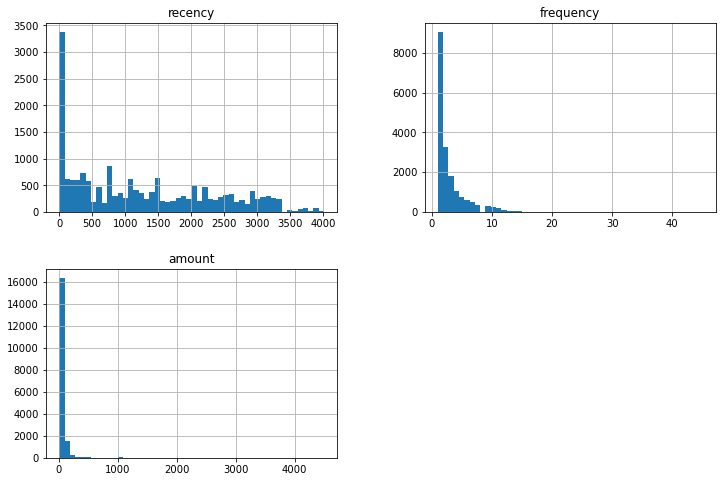

In [22]:
customer.hist(bins = 50, figsize = (12,8))
plt.show()

# all are very much right skewed

# we will do log transformation on each and every attributes of this dataframe

In [23]:
customer_new = customer.copy()

In [24]:
customer_new['log_amt'] = np.log(customer_new['amount'])
customer_new.head()

,recency,frequency,amount,log_amt
cust_id,,,,
10,3829,1,30.000000,3.401197
1000,1120,2,22.500000,3.113515
100000,2072,2,35.000000,3.555348
100010,413,7,27.857143,3.327089
100020,2750,1,30.000000,3.401197


<AxesSubplot:xlabel='log_amt', ylabel='Count'>

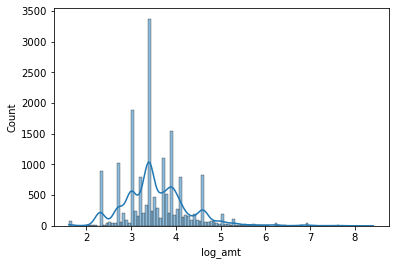

In [25]:
sns.histplot(customer_new['log_amt'], kde=True)

In [26]:
customer_new.index

Index(['10', '1000', '100000', '100010', '100020', '100030', '100040',
       '100050', '100060', '100070',
       ...
       '99880', '99890', '99900', '99930', '99940', '99950', '99960', '99970',
       '99980', '99990'],
      dtype='object', name='cust_id', length=18417)

# Standardizing the data

In [27]:
from sklearn.preprocessing import StandardScaler

In [28]:
scaler = StandardScaler()
scaled_cust = scaler.fit_transform(customer_new)
scaled_cust = pd.DataFrame(scaled_cust, columns=customer_new.columns, index=customer_new.index)
scaled_cust.head()

,recency,frequency,amount,log_amt
cust_id,,,,
10,2.382043,-0.606909,-0.180058,-0.235802
1000,-0.123023,-0.266403,-0.228647,-0.610597
100000,0.757311,-0.266403,-0.147665,-0.034973
100010,-0.776800,1.436125,-0.193940,-0.332350
100020,1.384271,-0.606909,-0.180058,-0.235802


# Using K-Means Algorithm for Clustering

In [29]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split as tts

In [30]:
kmeans = KMeans(n_clusters=6, random_state=4)

In [31]:
kmeans.fit(scaled_cust.drop('amount', axis=1))

KMeans(n_clusters=6, random_state=4)

In [32]:
scaled_cust.head()

,recency,frequency,amount,log_amt
cust_id,,,,
10,2.382043,-0.606909,-0.180058,-0.235802
1000,-0.123023,-0.266403,-0.228647,-0.610597
100000,0.757311,-0.266403,-0.147665,-0.034973
100010,-0.776800,1.436125,-0.193940,-0.332350
100020,1.384271,-0.606909,-0.180058,-0.235802


array([[<AxesSubplot:title={'center':'recency'}>,
        <AxesSubplot:title={'center':'frequency'}>],
       [<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'log_amt'}>]], dtype=object)

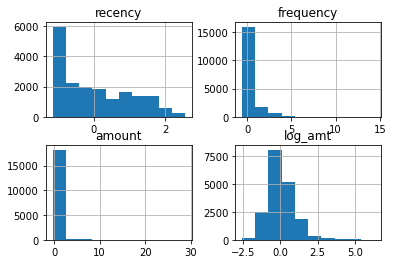

In [33]:
scaled_cust.hist()

In [34]:
kmeans.cluster_centers_

array([[-0.70067529, -0.1906149 ,  0.73489473],
       [-0.52467853, -0.26956122, -0.60428134],
       [ 1.32249555, -0.47114513, -0.84645855],
       [ 0.99008249, -0.34352761,  0.37541182],
       [-0.87191517,  2.19858912,  0.21914184],
       [-0.42848463,  0.11878999,  3.1945302 ]])

In [35]:
np.unique(kmeans.labels_)

array([0, 1, 2, 3, 4, 5])

In [36]:
customer_new['segments'] = kmeans.labels_
customer_new.head()

,recency,frequency,amount,log_amt,segments
cust_id,,,,,
10,3829,1,30.000000,3.401197,2
1000,1120,2,22.500000,3.113515,1
100000,2072,2,35.000000,3.555348,3
100010,413,7,27.857143,3.327089,4
100020,2750,1,30.000000,3.401197,2


In [37]:
customer.head()

,recency,frequency,amount
cust_id,,,
10,3829,1,30.000000
1000,1120,2,22.500000
100000,2072,2,35.000000
100010,413,7,27.857143
100020,2750,1,30.000000


In [38]:
customer_new.drop('log_amt', axis =1).to_csv('problem1.csv')

# Computing Mean of Every Segment

In [39]:
problem1_cross_tab = customer_new.groupby('segments').agg({'recency':['mean'],
                             'frequency':['mean'],'amount':['mean'], 'segments':['count']})

In [40]:
problem1_cross_tab

,recency,frequency,amount,segments
,mean,mean,mean,count
segments,,,,
0,495.063345,2.222369,68.055397,3773
1,685.646077,1.990725,24.109051,5391
2,2682.931034,1.399766,20.009668,3422
3,2322.966902,1.771208,52.970301,3112
4,311.191372,9.238642,52.057203,2179
5,786.774074,3.135185,612.739252,540


In [41]:
problem1_cross_tab.columns

MultiIndex([(  'recency',  'mean'),
            ('frequency',  'mean'),
            (   'amount',  'mean'),
            ( 'segments', 'count')],
           )

In [42]:
problem1_cross_tab.columns = ['mean_recency', 'mean_frequency', 'mean_amount', 'segment_count']

In [43]:
problem1_cross_tab

,mean_recency,mean_frequency,mean_amount,segment_count
segments,,,,
0,495.063345,2.222369,68.055397,3773
1,685.646077,1.990725,24.109051,5391
2,2682.931034,1.399766,20.009668,3422
3,2322.966902,1.771208,52.970301,3112
4,311.191372,9.238642,52.057203,2179
5,786.774074,3.135185,612.739252,540


In [44]:
n = 0
percentage_segment = []
def segment_percentage(x):
    global n
    global percentage_segment
    n = sum(list(x))
    y = list(x)
    for i in range(len(y)):
        k = (y[i]/n)*100
        percentage_segment.append(k)
    return percentage_segment

In [45]:
for i in list(problem1_cross_tab['segment_count']) : 
    print(i)

3773
5391
3422
3112
2179
540


In [46]:
y = list(problem1_cross_tab['segment_count'])
y

[3773, 5391, 3422, 3112, 2179, 540]

In [47]:
len(y)-1

5

In [48]:
segment_percentage(problem1_cross_tab['segment_count'])

[20.486507031546942,
 29.271868382472714,
 18.580659173589616,
 16.897431720692836,
 11.831460064071239,
 2.9320736276266492]

In [49]:
percentage_segment

[20.486507031546942,
 29.271868382472714,
 18.580659173589616,
 16.897431720692836,
 11.831460064071239,
 2.9320736276266492]

In [50]:
problem1_cross_tab['segment_percentage'] = percentage_segment

In [51]:
problem1_cross_tab

,mean_recency,mean_frequency,mean_amount,segment_count,segment_percentage
segments,,,,,
0,495.063345,2.222369,68.055397,3773,20.486507
1,685.646077,1.990725,24.109051,5391,29.271868
2,2682.931034,1.399766,20.009668,3422,18.580659
3,2322.966902,1.771208,52.970301,3112,16.897432
4,311.191372,9.238642,52.057203,2179,11.831460
5,786.774074,3.135185,612.739252,540,2.932074


### 3rd cluster and 4th cluster can be removed as these clusters having mean recency is quite higher seems to be the customers belonging to those clusters don't visit the store within last 7- 8 years.

### From the amount perspective 6th cluster is the most important as they helped to generate quite high revenue , but as their mean recency lies between 2 to 3 years, therefore we have to focus more on this cluster and provide attractive schemes so as to retain them for future business goals.

### the 5th cluster will be the second most important cluster having the minimum mean recency and highest frequency, seems that they are visiting the store quite frequently and their last visit time is also within 1 year.

### From the recency and amount generation perspective, 0th cluster should come after 4th cluster as their mean recency is within 2 years and mean amount is also more than $68.

# Part B

In [52]:
customer.head()

,recency,frequency,amount
cust_id,,,
10,3829,1,30.000000
1000,1120,2,22.500000
100000,2072,2,35.000000
100010,413,7,27.857143
100020,2750,1,30.000000


## Assigning Frequency Score

In [53]:
def frequency_score(x):
    if (x>3):
        return 3
    elif ((x>2)&(x<=3)):
        return 2
    else:
        return 1

In [54]:
customer['frequency_score'] = customer['frequency'].apply(lambda x: frequency_score(x))

In [55]:
customer.head()

,recency,frequency,amount,frequency_score
cust_id,,,,
10,3829,1,30.000000,1
1000,1120,2,22.500000,1
100000,2072,2,35.000000,1
100010,413,7,27.857143,3
100020,2750,1,30.000000,1


## Assigning Recency Score

In [56]:
def recency_score(x):
    if(x>730):
        return 1
    elif ((x>=365) & (x<=730)):
        return 2
    else :
        return 3

In [57]:
customer['recency_score'] = customer['recency'].apply(lambda x: recency_score(x))

In [58]:
customer.head(7)

,recency,frequency,amount,frequency_score,recency_score
cust_id,,,,,
10,3829,1,30.000000,1,1
1000,1120,2,22.500000,1,1
100000,2072,2,35.000000,1,1
100010,413,7,27.857143,3,2
100020,2750,1,30.000000,1,1
100030,2750,1,20.000000,1,1
100040,2121,2,20.000000,1,1


In [59]:
customer['amount'].max(),  customer['amount'].min()

(4500.0, 5.0)

## Assigning Monetary Score

In [60]:
def monetary_score(x):
    if(x<50):
        return 1
    elif ((x>=50) & (x<=800)):
        return 2
    else :
        return 3

In [61]:
customer['monetary_score'] = customer['amount'].apply(lambda x: monetary_score(x))

In [62]:
customer

,recency,frequency,amount,frequency_score,recency_score,monetary_score
cust_id,,,,,,
10,3829,1,30.000000,1,1,1
1000,1120,2,22.500000,1,1,1
100000,2072,2,35.000000,1,1,1
100010,413,7,27.857143,3,2,1
100020,2750,1,30.000000,1,1,1
...,...,...,...,...,...,...
99950,1097,2,30.000000,1,1,1
99960,2752,1,2007.000000,1,1,3
99970,30,10,46.500000,3,3,1


In [63]:
customer['RFM_SCORE'] = customer['recency_score']*100 + customer['frequency_score']*10 + customer['monetary_score']*1

In [64]:
customer

,recency,frequency,amount,frequency_score,recency_score,monetary_score,RFM_SCORE
cust_id,,,,,,,
10,3829,1,30.000000,1,1,1,111
1000,1120,2,22.500000,1,1,1,111
100000,2072,2,35.000000,1,1,1,111
100010,413,7,27.857143,3,2,1,231
100020,2750,1,30.000000,1,1,1,111
...,...,...,...,...,...,...,...
99950,1097,2,30.000000,1,1,1,111
99960,2752,1,2007.000000,1,1,3,113
99970,30,10,46.500000,3,3,1,331


Total No. of Segements based on RFM Score
Based on RFM score we got 27 segments for this customer transaction dataset.

Level of r_score =1,2,3

Level of f_score =1,2,3

Level of m_score =1,2,3

3x3x3 = 27 (Total number of Segment Combinations)

In [65]:
customer['RFM_SCORE'].nunique()

27

In [66]:
customer['recency_score'].nunique()

3

In [67]:
print("No of Best Customers:",len(customer[customer['RFM_SCORE']== 333]))

No of Best Customers: 18


In [68]:
customer['RFM_SCORE'].value_counts(ascending=False)

111    6582
112    2217
331    1523
311    1370
332    1026
131     881
211     818
312     802
121     699
212     413
321     403
132     368
231     331
122     256
322     224
232     171
221     121
222      83
113      51
313      27
333      18
213      13
233       5
133       5
323       5
223       3
123       2
Name: RFM_SCORE, dtype: int64

In [69]:
customer['RFM_SCORE'].value_counts(ascending=False)/18417*100

111    35.738720
112    12.037791
331     8.269534
311     7.438779
332     5.570940
131     4.783624
211     4.441549
312     4.354672
121     3.795406
212     2.242493
321     2.188196
132     1.998154
231     1.797253
122     1.390020
322     1.216268
232     0.928490
221     0.657002
222     0.450671
113     0.276918
313     0.146604
333     0.097736
213     0.070587
233     0.027149
133     0.027149
323     0.027149
223     0.016289
123     0.010860
Name: RFM_SCORE, dtype: float64

In [70]:
customer.groupby('RFM_SCORE').agg('amount').mean()

RFM_SCORE
111      24.609430
112      83.084096
113    1462.501078
121      27.888412
122      92.669596
123    1790.000000
131      29.366684
132     101.277966
133    1674.750000
211      26.528148
212      94.107748
213    1698.401538
221      29.336088
222      91.413574
223    2568.888889
231      29.539161
232      99.791692
233    1574.290476
311      28.171759
312     100.419264
313    1732.600370
321      29.570802
322     109.373512
323    1793.333333
331      30.471679
332     107.109710
333    1194.159452
Name: amount, dtype: float64

In [71]:
cross_table = customer.groupby(['recency_score','frequency_score', 'monetary_score'], as_index = False).agg({'recency':['count','mean'],
                                                                                                             'frequency':['count','mean'],
                                                                                                             'amount':['count','mean']})

In [72]:
cross_table.columns= ['recency_score', 'frequency_score', 'monetary_score',
                     'recency_count','recency_mean','frequency_count','frequency_mean','amount_count','amount_mean']

In [73]:
cross_table

,recency_score,frequency_score,monetary_score,recency_count,recency_mean,frequency_count,frequency_mean,amount_count,amount_mean
0,1,1,1,6582,2097.802492,6582,1.252963,6582,24.609430
1,1,1,2,2217,1889.867839,2217,1.220568,2217,83.084096
2,1,1,3,51,1981.745098,51,1.254902,51,1462.501078
3,1,2,1,699,1736.582260,699,3.000000,699,27.888412
4,1,2,2,256,1641.507812,256,3.000000,256,92.669596
5,1,2,3,2,1981.500000,2,3.000000,2,1790.000000
6,1,3,1,881,1475.059024,881,5.609535,881,29.366684
7,1,3,2,368,1456.404891,368,5.817935,368,101.277966
8,1,3,3,5,1462.200000,5,5.800000,5,1674.750000
9,2,1,1,818,505.739609,818,1.283619,818,26.528148


In [74]:
cross_table.head()

,recency_score,frequency_score,monetary_score,recency_count,recency_mean,frequency_count,frequency_mean,amount_count,amount_mean
0,1,1,1,6582,2097.802492,6582,1.252963,6582,24.609430
1,1,1,2,2217,1889.867839,2217,1.220568,2217,83.084096
2,1,1,3,51,1981.745098,51,1.254902,51,1462.501078
3,1,2,1,699,1736.582260,699,3.000000,699,27.888412
4,1,2,2,256,1641.507812,256,3.000000,256,92.669596


In [75]:
customer

,recency,frequency,amount,frequency_score,recency_score,monetary_score,RFM_SCORE
cust_id,,,,,,,
10,3829,1,30.000000,1,1,1,111
1000,1120,2,22.500000,1,1,1,111
100000,2072,2,35.000000,1,1,1,111
100010,413,7,27.857143,3,2,1,231
100020,2750,1,30.000000,1,1,1,111
...,...,...,...,...,...,...,...
99950,1097,2,30.000000,1,1,1,111
99960,2752,1,2007.000000,1,1,3,113
99970,30,10,46.500000,3,3,1,331


Recency = 1 and monetary value = 1 or 2 ---> Inactive

Recency = 1 and monetary value = 3      ---> Cold (came more than 2 years ago and at that time monetray value was good)

Recency = 2 and monetary value = 1      ---> Warm New (came within 1 to 2 years and purchasing power very poor)

Recency = 2 and monetary value = 2      ---> Warm Low (came within 1 to 2 years and purchasing power medium)

Recency = 2 and monetary value = 3      ---> Warm High (came within 1 to 2 years and purchasing power very good)

Recency = 3 and monetary value = 1 or 2 ---> Active Low (came within 1 year but purchasing power is low or medium)

Recency = 3 and monetary value = 3 and frequency = 1 or 2 ---> Active High (came within 1 year, with good purchasing power 
                                                                           and frequency is low)
                                                                           
Recency = 3 and frequency = 3 and monetary value = 3      ---> Best segment

In [76]:
cust = customer.copy()

In [77]:
cust.head()

,recency,frequency,amount,frequency_score,recency_score,monetary_score,RFM_SCORE
cust_id,,,,,,,
10,3829,1,30.000000,1,1,1,111
1000,1120,2,22.500000,1,1,1,111
100000,2072,2,35.000000,1,1,1,111
100010,413,7,27.857143,3,2,1,231
100020,2750,1,30.000000,1,1,1,111


In [78]:
def sales_label(cust):
    if cust['RFM_SCORE'] == 333:
        r = 'Most Important'
    elif cust['RFM_SCORE'] == 111:
        r = 'Inactive'
    elif cust['recency_score'] == 1:
        if cust['frequency_score'] == 1 and cust['monetary_score'] == 3:
            r = 'Cold'
        elif cust['frequency_score'] == 2 and cust['monetary_score'] == 3:
            r = 'Cold'
        elif cust['frequency_score'] == 3 and cust['monetary_score'] == 3:
            r = 'Cold'
        else:
            r = 'Inactive'
    elif cust['recency_score'] == 2:
        if cust['frequency_score'] == 1 and cust['monetary_score'] == 1:
            r = 'Warm New'
        elif cust['frequency_score'] == 2 and cust['monetary_score'] == 1:
            r = 'Warm New'
        elif cust['frequency_score'] == 3 and cust['monetary_score'] == 1:
            r = 'Warm New'
        elif cust['frequency_score'] == 1 and cust['monetary_score'] == 3:
            r = 'Warm High'
        elif cust['frequency_score'] == 2 and cust['monetary_score'] == 3:
            r = 'Warm High'
        elif cust['frequency_score'] == 3 and cust['monetary_score'] == 3:
            r = 'Warm High'
        elif cust['frequency_score'] == 1 and cust['monetary_score'] == 2:
            r = 'Warm Low'
        elif cust['frequency_score'] == 2 and cust['monetary_score'] == 2:
            r = 'Warm Low'
        elif cust['frequency_score'] == 3 and cust['monetary_score'] == 2:
            r = 'Warm Low'
        else:
            r = 'Warm'
    elif cust['recency_score'] == 3:
        if cust['frequency_score'] == 3 and cust['monetary_score'] == 1:
            r = 'Active Low'
        elif cust['frequency_score'] == 3 and cust['monetary_score'] == 2:
            r = 'Active Low'
        elif cust['frequency_score'] == 1 and cust['monetary_score'] == 2:
            r = 'Active Low'
        elif cust['frequency_score'] == 2 and cust['monetary_score'] == 2:
            r = 'Active Low'
        elif cust['frequency_score'] == 2 and cust['monetary_score'] == 1:
            r = 'Active Low'
        elif cust['frequency_score'] == 1 and cust['monetary_score'] == 1:
            r = 'Active Low'
        elif cust['frequency_score'] == 1 and cust['monetary_score'] == 3:
            r = 'Active High'
        elif cust['frequency_score'] == 2 and cust['monetary_score'] == 3:
            r = 'Active High'
        else:
            r = 'Active'
            
    return r


In [79]:
cust['Sales_Label'] = cust.apply(sales_label, axis = 1)

In [80]:
cust

,recency,frequency,amount,frequency_score,recency_score,monetary_score,RFM_SCORE,Sales_Label
cust_id,,,,,,,,
10,3829,1,30.000000,1,1,1,111,Inactive
1000,1120,2,22.500000,1,1,1,111,Inactive
100000,2072,2,35.000000,1,1,1,111,Inactive
100010,413,7,27.857143,3,2,1,231,Warm New
100020,2750,1,30.000000,1,1,1,111,Inactive
...,...,...,...,...,...,...,...,...
99950,1097,2,30.000000,1,1,1,111,Inactive
99960,2752,1,2007.000000,1,1,3,113,Cold
99970,30,10,46.500000,3,3,1,331,Active Low


In [81]:
label = ['Active','Cold','Inactive']
cust.loc[cust['Sales_Label'].isin(label)]

,recency,frequency,amount,frequency_score,recency_score,monetary_score,RFM_SCORE,Sales_Label
cust_id,,,,,,,,
10,3829,1,30.0,1,1,1,111,Inactive
1000,1120,2,22.5,1,1,1,111,Inactive
100000,2072,2,35.0,1,1,1,111,Inactive
100020,2750,1,30.0,1,1,1,111,Inactive
100030,2750,1,20.0,1,1,1,111,Inactive
...,...,...,...,...,...,...,...,...
99940,2752,1,30.0,1,1,1,111,Inactive
99950,1097,2,30.0,1,1,1,111,Inactive
99960,2752,1,2007.0,1,1,3,113,Cold


In [82]:
cust.loc[cust['Sales_Label'] == 'Active']

,recency,frequency,amount,frequency_score,recency_score,monetary_score,RFM_SCORE,Sales_Label
cust_id,,,,,,,,


In [83]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18417 entries, 10 to 99990
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   recency          18417 non-null  int64  
 1   frequency        18417 non-null  int64  
 2   amount           18417 non-null  float64
 3   frequency_score  18417 non-null  int64  
 4   recency_score    18417 non-null  int64  
 5   monetary_score   18417 non-null  int64  
 6   RFM_SCORE        18417 non-null  int64  
 7   Sales_Label      18417 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 1.8+ MB


## Checking count of each type and their percentage

In [84]:
segment_count = cust['Sales_Label'].value_counts()

In [85]:
segment_count

Inactive          11003
Active Low         5348
Warm New           1270
Warm Low            667
Cold                 58
Active High          32
Warm High            21
Most Important       18
Name: Sales_Label, dtype: int64

In [86]:
len(cust)

18417

In [87]:
segment_percentage = cust['Sales_Label'].value_counts()/len(cust)*100

In [88]:
segment_percentage

Inactive          59.743715
Active Low        29.038388
Warm New           6.895803
Warm Low           3.621654
Cold               0.314926
Active High        0.173753
Warm High          0.114025
Most Important     0.097736
Name: Sales_Label, dtype: float64

In [89]:
segment_mean_amt = cust.groupby('Sales_Label').agg('amount').mean()

In [90]:
segment_mean_amt

Sales_Label
Active High       1742.089896
Active Low          58.311741
Cold              1492.091466
Inactive            41.128462
Most Important    1194.159452
Warm High         1793.206621
Warm Low            95.229694
Warm New            27.580436
Name: amount, dtype: float64

In [91]:
New_Customer_DF = pd.DataFrame({'segment_count':segment_count, 'segment_percentage': segment_percentage,
                               'segment_mean_amount': segment_mean_amt})

In [92]:
New_Customer_DF

,segment_count,segment_percentage,segment_mean_amount
Active High,32,0.173753,1742.089896
Active Low,5348,29.038388,58.311741
Cold,58,0.314926,1492.091466
Inactive,11003,59.743715,41.128462
Most Important,18,0.097736,1194.159452
Warm High,21,0.114025,1793.206621
Warm Low,667,3.621654,95.229694
Warm New,1270,6.895803,27.580436


In [93]:
New_Customer_DF['Sales_Amount'] = New_Customer_DF['segment_count'] * New_Customer_DF['segment_mean_amount']

In [94]:
New_Customer_DF

,segment_count,segment_percentage,segment_mean_amount,Sales_Amount
Active High,32,0.173753,1742.089896,55746.876667
Active Low,5348,29.038388,58.311741,311851.189013
Cold,58,0.314926,1492.091466,86541.305000
Inactive,11003,59.743715,41.128462,452536.466771
Most Important,18,0.097736,1194.159452,21494.870130
Warm High,21,0.114025,1793.206621,37657.339048
Warm Low,667,3.621654,95.229694,63518.205947
Warm New,1270,6.895803,27.580436,35027.154045


## Managerial Segments Based on RFM Score

segment_count : count of each segment

segment_percentage : Percentage of each segment

segment_mean_amount : Average Monetary amount of each segment

Sales_Amount : Total monetary amount of each segment